Part of this code is based on DATAPROFESSOR'S project which is public on his github and youtube chanell. You can find them on:
* Youtube: [Bioinformatics project](https://www.youtube.com/playlist?list=PLtqF5YXg7GLlQJUv9XJ3RWdd5VYGwBHrP )

* GitHub: [Dataprofessor](https://github.com/dataprofessor/code/tree/master/python)

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/StevieCL/Random_Forest_Classifier_AR/master/Files/AID_743053_datatable_all.csv')

In [ ]:
df

,Unnamed: 0,CID,Activity_Outcome,Activity_Score,Ratio_Potency_(uM),MW,Polar_Area,Complexity,Heavy_Count,HBondDonor,HBondAcc,RotBonds,IsoSMILES
0,0,12850184,Inactive,0,100.00000,426.34,276.0,196.0,27,8,14,8,C(C(=O)[C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O.C(...
1,1,89753,Inactive,0,100.00000,527.60,283.0,165.0,27,10,14,8,C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...
2,2,9403,Active,53,2.58222,396.60,46.5,597.0,29,1,3,5,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2OC(=O)CCC...
3,3,13218779,Inactive,0,100.00000,253.36,75.4,384.0,17,0,4,4,C[C@@]12CC[C@@H](C1(C)C)C[C@H]2OC(=O)CSC#N
4,4,142766,Inactive,0,100.00000,283.28,90.6,270.0,21,3,5,1,C1=CC=C(C(=C1)C(=O)O)O.C1=CC2=C(C(=C1)O)N=CC=C2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7412,7412,74483,Inactive,0,100.00000,500.13,62.8,727.0,29,1,20,7,C(C(C(C(C(F)(F)S(=O)(=O)O)(F)F)(F)F)(F)F)(C(C(...
7413,7413,8343,Inactive,0,100.00000,390.60,52.6,394.0,28,0,4,16,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)OCC(CC)CCCC
7414,7414,47898,Inactive,0,100.00000,323.31,38.3,398.0,23,1,5,4,CC(C)OC1=CC=CC(=C1)NC(=O)C2=CC=CC=C2C(F)(F)F
7415,7415,3034285,Inactive,0,100.00000,403.40,104.0,646.0,30,0,8,8,CO/C=C(\\C1=CC=CC=C1OC2=NC=NC(=C2)OC3=CC=CC=C3...


# Active vs Inactive compounds

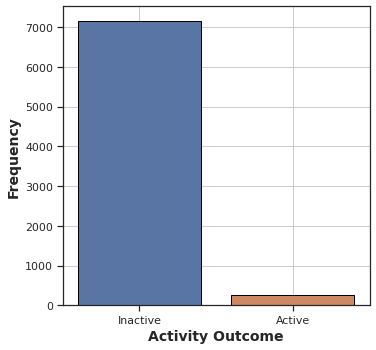

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='Activity_Outcome', data=df, edgecolor='black')
plt.xlabel('Activity Outcome', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(True)

In [ ]:
def InactiveAndActive(df):
  inactive = len(df[df.Activity_Outcome == 'Inactive'])
  active = len(df[df.Activity_Outcome == 'Active'])
  print('There are {} inactive compounds in dataset.'.format(inactive) )
  print('-'*45)
  print('There are {} active compounds in dataset.'.format(active) )

InactiveAndActive(df)

There are 7163 inactive compounds in dataset.
---------------------------------------------
There are 254 active compounds in dataset.


We can observe difference of frequency between inactive and active compounds is huge. A lot of inactive compounds will be deleted in order to have a more balanced dataset. 

In [ ]:
deleted = (df[df.Activity_Outcome== 'Inactive'][300:]).index
df.drop(deleted, inplace=True)

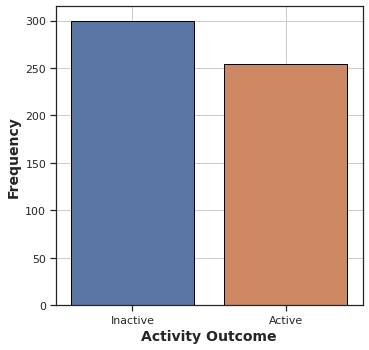

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='Activity_Outcome', data=df, edgecolor='black')
plt.xlabel('Activity Outcome', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(True)

Now we have a more balanced dataset. An important thing to do in next iteration would be a more sophisticated deletion of inactive compounds. 

# Analysis by molecular weight

We can observe distributions of molecular weight are different from inactive and active compounds.

Text(0, 0.5, 'MW')

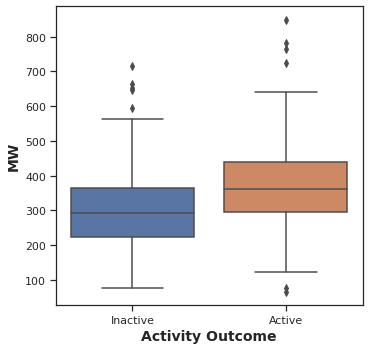

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='Activity_Outcome', y='MW', data=df)
plt.xlabel('Activity Outcome', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

# Analysis by hydrogen bonds donors and acceptors

## Number of hydrogen donors

We can see active compounds have a bigger distribution of their hydrogen donors, it is concentrated between 0 and 2, while the distribution of the inactive compounds is mainly between 1 and 2.

Text(0, 0.5, 'NumHDonors')

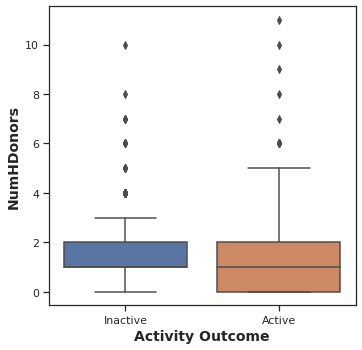

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='Activity_Outcome', y='HBondDonor', data=df)
plt.xlabel('Activity Outcome', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

## Number of hydrogen acceptors

It is observed that the two distributions differ considerably, the distribution of the active compounds is broader. However, both medians are located at the same value.

Text(0, 0.5, 'NumHAcceptors')

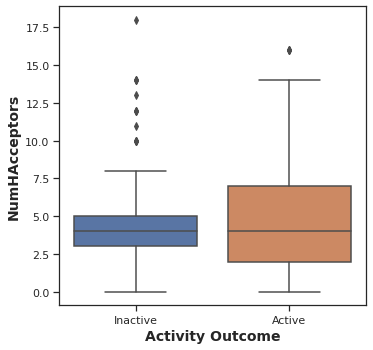

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='Activity_Outcome', y='HBondAcc', data=df)
plt.xlabel('Activity Outcome', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

# Analysis by heavy atoms count

We can see distribution of heavy atoms count from active compounds is located in a bigger range than inactive compounds. We can expect to find more heavy atoms in active compounds than in inactive ones. 

Text(0, 0.5, 'Heavy atoms count')

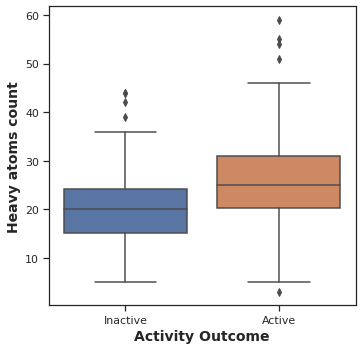

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='Activity_Outcome', y='Heavy_Count', data=df)
plt.xlabel('Activity Outcome', fontsize=14, fontweight='bold')
plt.ylabel('Heavy atoms count', fontsize=14, fontweight='bold')

# Analysis by rotatable bonds

It doesn't look very differently the two distributions.

Text(0, 0.5, 'Rotatable Bonds')

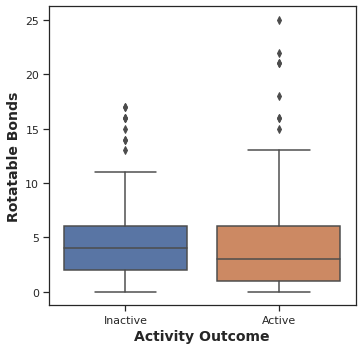

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='Activity_Outcome', y='RotBonds', data=df)
plt.xlabel('Activity Outcome', fontsize=14, fontweight='bold')
plt.ylabel('Rotatable Bonds', fontsize=14, fontweight='bold')

# Conclusion

We conclude that following chemical properties of the compounds may be important to define the activity on human nuclear receptor:

* Molecular weight
* Hydrogen bonds donors and acceptors
* Heavy atoms 

In [ ]:
df.to_csv('Data_to_prepare.csv')